In [1]:
import pandas as pd
import seaborn as sns

Let's look at aquifers first

In [2]:
df = pd.read_csv('data/Aquifer_Auser.csv')

Outputs : `Depth_to_Groundwater_SAL`, `Depth_to_Groundwater_COS`, `Depth_to_Groundwater_LT2`


Data contains a lot of nulls. We need to find ways of dealing with missing data. Most likely, it will have to be dropped

In [3]:
df.shape

(8154, 27)

In [4]:
df.isnull().sum()/df.shape[0]*100

Date                                        0.000000
Rainfall_Gallicano                         35.062546
Rainfall_Pontetetto                        35.062546
Rainfall_Monte_Serra                       35.136130
Rainfall_Orentano                          35.062546
Rainfall_Borgo_a_Mozzano                   35.062546
Rainfall_Piaggione                         39.538877
Rainfall_Calavorno                         35.062546
Rainfall_Croce_Arcana                      35.062546
Rainfall_Tereglio_Coreglia_Antelminelli    35.062546
Rainfall_Fabbriche_di_Vallico              35.062546
Depth_to_Groundwater_LT2                   41.108658
Depth_to_Groundwater_SAL                   44.260486
Depth_to_Groundwater_PAG                   53.311258
Depth_to_Groundwater_CoS                   47.081187
Depth_to_Groundwater_DIEC                  59.896983
Temperature_Orentano                        0.000000
Temperature_Monte_Serra                     0.000000
Temperature_Ponte_a_Moriano                 0.

In [5]:
df['Date']

0       05/03/1998
1       06/03/1998
2       07/03/1998
3       08/03/1998
4       09/03/1998
           ...    
8149    26/06/2020
8150    27/06/2020
8151    28/06/2020
8152    29/06/2020
8153    30/06/2020
Name: Date, Length: 8154, dtype: object

In [6]:
df['Date']  = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [7]:
df['Date'].isnull().sum()

0

I need to find the date range for which the data is nulls. This needs to be a generic function, applicable to other datasets too. Essentially, I want to look at gaps in data, where there might be nulls in the middle, instead of chunks as we can see in some cases

In [8]:
df[~df['Rainfall_Gallicano'].isnull()]['Date'].diff().max()

Timedelta('1 days 00:00:00')

In [9]:
def null_values_diff(df,col,date_col='Date'):
    return df[~df[col].isnull()][date_col].diff().dropna()

In [10]:
def null_data_int(df,col,date_col='Date'):
    return null_values_diff(df,col,date_col).astype(int)/86400000000000

In [11]:
for col_name in [x for x in df.columns if 'Rain' in x]:
    print(col_name)
    max_date_diff = null_values_diff(df,col_name).max()
    print(max_date_diff)
    if max_date_diff > pd.Timedelta(days=1):
        print((null_values_diff(df,col_name)>pd.Timedelta(days=1)).sum())

Rainfall_Gallicano
1 days 00:00:00
Rainfall_Pontetetto
1 days 00:00:00
Rainfall_Monte_Serra
3 days 00:00:00
4
Rainfall_Orentano
1 days 00:00:00
Rainfall_Borgo_a_Mozzano
1 days 00:00:00
Rainfall_Piaggione
366 days 00:00:00
1
Rainfall_Calavorno
1 days 00:00:00
Rainfall_Croce_Arcana
1 days 00:00:00
Rainfall_Tereglio_Coreglia_Antelminelli
1 days 00:00:00
Rainfall_Fabbriche_di_Vallico
1 days 00:00:00


In [32]:
# sns.distplot(null_data_int(df,'Rainfall_Fabbriche_di_Vallico'))

<AxesSubplot:xlabel='Date', ylabel='Depth_to_Groundwater_LT2'>

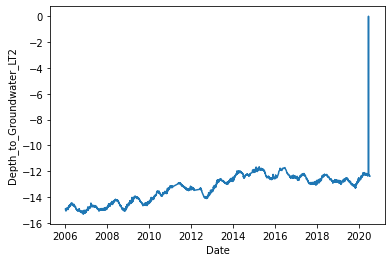

In [20]:
sns.lineplot(x= 'Date',y='Depth_to_Groundwater_LT2',data=df)

In [33]:
df.dropna()['Date'].diff().max()

Timedelta('158 days 00:00:00')

<AxesSubplot:xlabel='Date', ylabel='Density'>

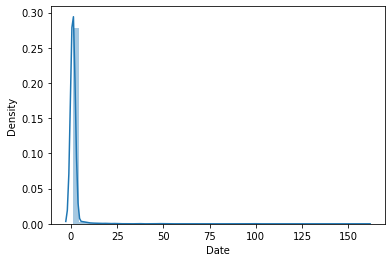

In [32]:
sns.distplot(df.dropna()['Date'].diff().dropna().astype(int)/86400000000000)